<h1>Assignment 2</h1>
        <h2>1)  The Energy Dataset </h2>


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

# Importing the dataset
dataset = pd.read_csv('energydata_complete.csv')
dataset=dataset.drop(['date','lights'],axis=1)

dataset["consumption_level"]=[1 if x>=dataset["Appliances"].mean() else 0 for x in dataset["Appliances"]]


X = dataset.iloc[:,1:27].values #X = dataset.iloc[:,1:].values

y = dataset.iloc[:,27].values

#part 1
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)





dataset.head()
y

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [12]:

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0)
classifier_svm_linear.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svm_linear.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svm_linear = confusion_matrix(y_test, y_pred)

report=classification_report(y_test,y_pred)
accu_svm_linear=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train, cv = 10)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

print(cm_svm_linear,end='\n')
print(report,end='\n')
print(accu_svm_linear*100,end='\n')
#after using cross validation with 10 folds
print(mean_svm_linear*100,end='\n')
print(std_svm_linear*100,end='\n')

[[4171  205]
 [ 996  549]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4376
           1       0.73      0.36      0.48      1545

   micro avg       0.80      0.80      0.80      5921
   macro avg       0.77      0.65      0.68      5921
weighted avg       0.79      0.80      0.77      5921

79.71626414457018
78.72443021571107
0.8022298365680733


In [13]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc_rbf = SVC(kernel = 'rbf', random_state = 0,gamma='auto')
classifier_svc_rbf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svc_rbf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svc_rbf = confusion_matrix(y_test, y_pred)

accu_svc_rbf=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print()
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svc_rbf, X = X_train, y = y_train, cv = 10)
mean_svc_rbf=accuracies.mean()
std_svc_rbf=accuracies.std()

print(cm_svc_rbf,end='\n')
print(report,end='\n')
print(accu_svc_rbf*100,end='\n')
#after using cross validation with 10 folds
print(mean_svc_rbf*100,end='\n')
print(std_svc_rbf*100,end='\n')




[[4172  204]
 [ 709  836]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4376
           1       0.80      0.54      0.65      1545

   micro avg       0.85      0.85      0.85      5921
   macro avg       0.83      0.75      0.77      5921
weighted avg       0.84      0.85      0.83      5921

84.58030738051005
82.77118513367341
1.1764230019492208


In [36]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc_poly = SVC(kernel = 'poly', random_state = 0,gamma='auto')
classifier_svc_poly.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svc_poly.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_svc_poly = confusion_matrix(y_test, y_pred)


accu_svc_poly=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svc_poly, X = X_train, y = y_train, cv = 10)
mean_svc_poly=accuracies.mean()
std_svc_poly=accuracies.std()

print(cm_svc_poly,end='\n')
report=classification_report(y_test,y_pred)
print(report,end='\n')

print(accu_svc_poly*100,end='\n')
#after using cross validation with 10 folds
print(mean_svc_poly*100,end='\n')
print(std_svc_poly*100,end='\n')

[[4244  132]
 [ 935  610]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4376
           1       0.82      0.39      0.53      1545

   micro avg       0.82      0.82      0.82      5921
   macro avg       0.82      0.68      0.71      5921
weighted avg       0.82      0.82      0.80      5921

81.9793953724033
80.8456310886925
0.8148693691328779


In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
  

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



plotting the graphs

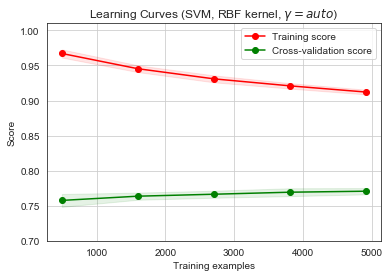

In [46]:
from sklearn.model_selection import ShuffleSplit

title = r"Learning Curves (SVM, RBF kernel, $\gamma=auto$)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = SVC(kernel = 'rbf', random_state = 0,gamma='auto')
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

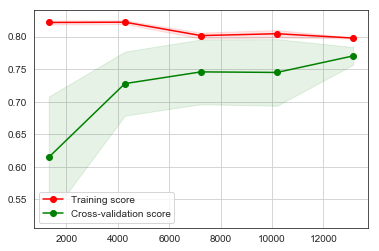

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_svm_linear, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_svc_poly, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

<h3> The Best performing type of SVM is the RBF kernel SVM with an Accuracy around 82.7 % when cross validation is applied with 10 folds

<h1> Decision Tree</h1>



In [3]:
# Fitting Decision Tree Classification to the Training set with information gain as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DF_entropy.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DF_entropy.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_DF_entropy = confusion_matrix(y_test, y_pred)
accu_DF_entropy=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DF_entropy, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_entropy=accuracies.mean()
std_DF_entropy=accuracies.std()

print(cm_DF_entropy,end='\n')
print(accu_DF_entropy*100,end='\n')
report=classification_report(y_test,y_pred)
print(report,end='\n')

#after using cross validation with 10 folds
print(mean_DF_entropy*100,end='\n')
print(std_DF_entropy*100,end='\n')

[[4001  375]
 [ 386 1159]]
87.14744131058943
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4376
           1       0.76      0.75      0.75      1545

   micro avg       0.87      0.87      0.87      5921
   macro avg       0.83      0.83      0.83      5921
weighted avg       0.87      0.87      0.87      5921

86.87583246450863
0.7454770219055158


<function matplotlib.pyplot.show(*args, **kw)>

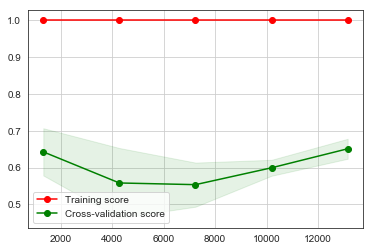

In [4]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_entropy, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [5]:
# Fitting Decision Tree Classification to the Training set with gini index as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_DF_gini.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DF_gini.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_DF_gini = confusion_matrix(y_test, y_pred)

accu_DF_gini=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DF_gini, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_DF_gini,end='\n')
print(accu_DF_gini*100,end='\n')
report=classification_report(y_test,y_pred)
print(report,end='\n')

#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[4002  374]
 [ 372 1173]]
87.40077689579464
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4376
           1       0.76      0.76      0.76      1545

   micro avg       0.87      0.87      0.87      5921
   macro avg       0.84      0.84      0.84      5921
weighted avg       0.87      0.87      0.87      5921

86.97006673992085
0.9151080901673867


<function matplotlib.pyplot.show(*args, **kw)>

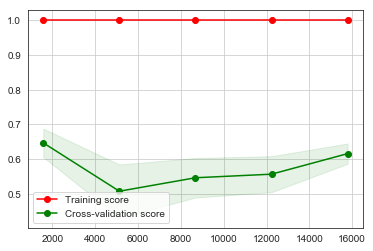

In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_gini, X, y,cv=5,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [18]:
#playing around with the pruning to get the best decision tree
#performing grid search to find the best type of SVM and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search, Kernel SVM to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decisionTree = DecisionTreeClassifier(criterion='gini',random_state = 0)
classifier_decisionTree.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]},
              {'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = classifier_decisionTree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8575358332126828
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 5}


<h1>Boosting<h1>
    

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm_GBC = confusion_matrix(y_test, y_pred)

accu_GBC=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_GBC,end='\n')
print(accu_GBC*100,end='\n')
report=classification_report(y_test,y_pred)
print(report,end='\n')

#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[4376    0]
 [1511   34]]
74.48066205032934
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4376
           1       1.00      0.02      0.04      1545

   micro avg       0.74      0.74      0.74      5921
   macro avg       0.87      0.51      0.45      5921
weighted avg       0.81      0.74      0.64      5921

74.06982906095448
0.21323727016397767


<function matplotlib.pyplot.show(*args, **kw)>

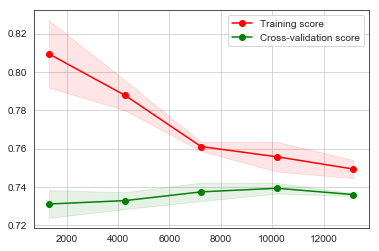

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [11]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(random_state=1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm_GBC = confusion_matrix(y_test, y_pred)

accu_GBC=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_GBC,end='\n')
print(accu_GBC*100,end='\n')
report=classification_report(y_test,y_pred)
print(report,end='\n')

#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[4086  290]
 [ 949  596]]
79.07448066205033
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4376
           1       0.67      0.39      0.49      1545

   micro avg       0.79      0.79      0.79      5921
   macro avg       0.74      0.66      0.68      5921
weighted avg       0.78      0.79      0.77      5921

78.41320302033729
0.6437537657665452


<function matplotlib.pyplot.show(*args, **kw)>

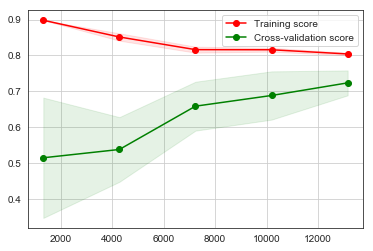

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [14]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [500,1000,2000,5000]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

KeyboardInterrupt: 

<h1>Dataset 2<h1>
    <h2>Telecom churn<h2>

In [2]:
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Overview

In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
telcom.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Converting Total Charges to a numerical data type.
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set



In [6]:
#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
    #Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


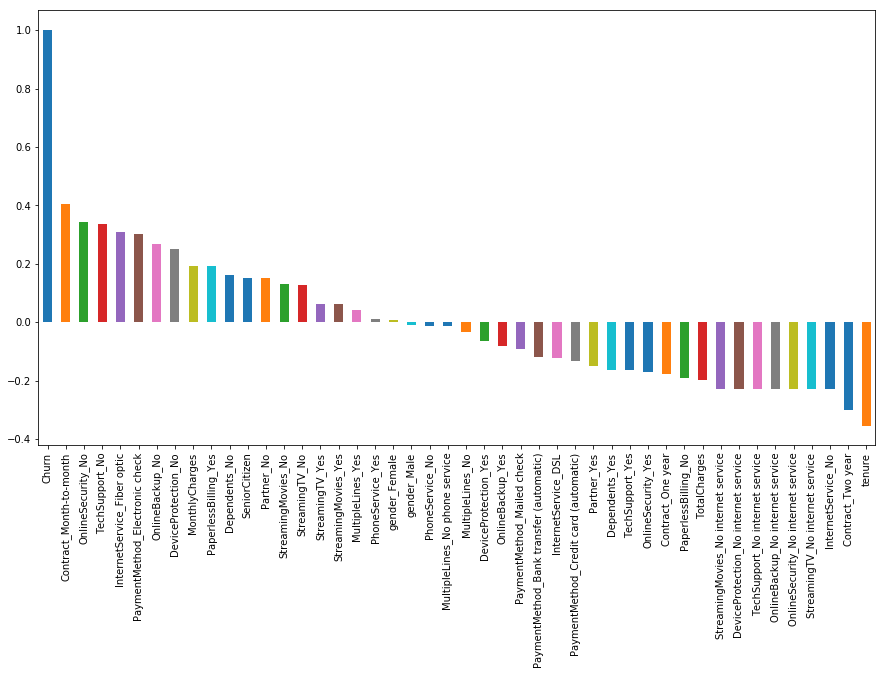

In [7]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn

In [8]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)






from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



C:\Users\prasa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\prasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [9]:

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0)
classifier_svm_linear.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svm_linear.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm_svm_linear = confusion_matrix(y_test, y_pred)

cm_svm_linear
accu_svm_linear=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train, cv = 10)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

print(cm_svm_linear,end='\n')
print(accu_svm_linear*100,end='\n')
#after using cross validation with 10 folds
print(mean_svm_linear*100,end='\n')
print(std_svm_linear*100,end='\n')

[[1340  144]
 [ 289  337]]
79.478672985782
79.94816146599476
1.4313524902913912


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_svm_linear, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc_rbf = SVC(kernel = 'rbf', random_state = 0,gamma='auto')
classifier_svc_rbf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svc_rbf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc_rbf = confusion_matrix(y_test, y_pred)

accu_svc_rbf=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svc_rbf, X = X_train, y = y_train, cv = 10)
mean_svc_rbf=accuracies.mean()
std_svc_rbf=accuracies.std()

print(cm_svc_rbf,end='\n')
print(accu_svc_rbf*100,end='\n')
#after using cross validation with 10 folds
print(mean_svc_rbf*100,end='\n')
print(std_svc_rbf*100,end='\n')

[[1374  110]
 [ 321  305]]
79.5734597156398
80.02983282353861
1.5414684019182638


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_svc_rbf, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [34]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc_poly = SVC(kernel = 'poly', random_state = 0,gamma='auto')
classifier_svc_poly.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svc_poly.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc_poly = confusion_matrix(y_test, y_pred)


accu_svc_poly=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svc_poly, X = X_train, y = y_train, cv = 10)
mean_svc_poly=accuracies.mean()
std_svc_poly=accuracies.std()

print(cm_svc_poly,end='\n')
print(accu_svc_poly*100,end='\n')
#after using cross validation with 10 folds
print(mean_svc_poly*100,end='\n')
print(std_svc_poly*100,end='\n')

[[1369  115]
 [ 339  287]]
78.48341232227489
79.68438648757335
1.6151670453260163


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_svc_poly, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

<h3>The Best performing type of SVM is the RBF kernel SVM with an Accuracy around 82.7 % when cross validation is applied with 10 folds, But we have to note that all the tree models almost have the same accruacy.</h3>

<h1> Decision Tree</h1>


In [21]:
# Fitting Decision Tree Classification to the Training set with information gain as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DF_entropy.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DF_entropy.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm_DF_entropy = confusion_matrix(y_test, y_pred)
accu_DF_entropy=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DF_entropy, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_entropy=accuracies.mean()
std_DF_entropy=accuracies.std()

print(cm_DF_entropy,end='\n')
print(accu_DF_entropy*100,end='\n')
#after using cross validation with 10 folds
print(mean_DF_entropy*100,end='\n')
print(std_DF_entropy*100,end='\n')

[[1209  275]
 [ 307  319]]
72.41706161137441
73.22273859432347
1.2512752696715435


<function matplotlib.pyplot.show(*args, **kw)>

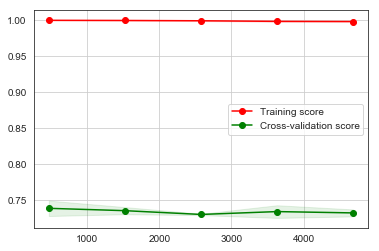

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_entropy, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [23]:
# Fitting Decision Tree Classification to the Training set with gini index as criterion
from sklearn.tree import DecisionTreeClassifier
classifier_DF_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_DF_gini.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_DF_gini.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score 
cm_DF_gini = confusion_matrix(y_test, y_pred)

accu_DF_gini=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_DF_gini, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_DF_gini,end='\n')
print(accu_DF_gini*100,end='\n')
#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[1208  276]
 [ 304  322]]
72.51184834123224
73.50675665667768
1.4789435530785273


<function matplotlib.pyplot.show(*args, **kw)>

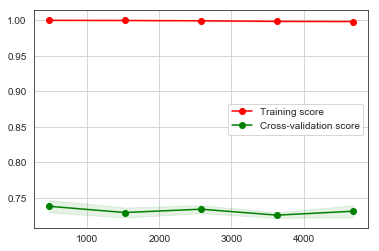

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_DF_gini, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [38]:
#playing around with the pruning to get the best decision tree
#performing grid search to find the best type of SVM and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search, Kernel SVM to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decisionTree = DecisionTreeClassifier(criterion='gini',random_state = 0)
classifier_decisionTree.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]},
              {'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = classifier_decisionTree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy*100,end='\n')
print(best_parameters,end='\n')

79.90654205607477
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}


<h3>Boosting </h3>

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GB = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifier_GB.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_GB.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score 
cm_DF_gini = confusion_matrix(y_test, y_pred)

accu_DF_gini=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_GB, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_DF_gini,end='\n')
print(accu_DF_gini*100,end='\n')
#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[1451   33]
 [ 488  138]]
75.30805687203791
78.15941754597313
1.1144272883271304


<function matplotlib.pyplot.show(*args, **kw)>

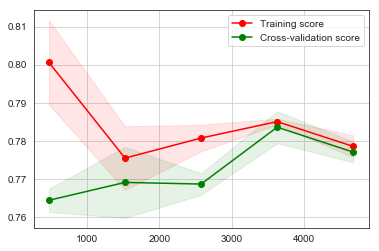

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_GB, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [27]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ADA = AdaBoostClassifier(random_state=1)
classifier_ADA.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_ADA.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score 
cm_DF_gini = confusion_matrix(y_test, y_pred)

accu_DF_gini=accuracy_score(y_test,y_pred)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_ADA, X = X_train, y = y_train, cv = 10,n_jobs=-1)
mean_DF_gini=accuracies.mean()
std_DF_gini=accuracies.std()

print(cm_DF_gini,end='\n')
print(accu_DF_gini*100,end='\n')
#after using cross validation with 10 folds
print(mean_DF_gini*100,end='\n')
print(std_DF_gini*100,end='\n')

[[1366  118]
 [ 321  305]]
79.19431279620854
79.9072228022074
0.7984916539102733


<function matplotlib.pyplot.show(*args, **kw)>

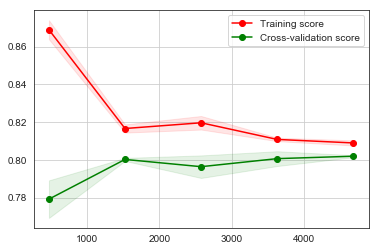

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier_ADA, X, y,cv=3,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show

In [42]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50,100,200,300,500,1000,1500]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8013002844372207
{'n_estimators': 500}
